In [2]:
import os
import numpy as np
from IPython.display import Image, display
import seaborn as sns
import matplotlib.pyplot as plt

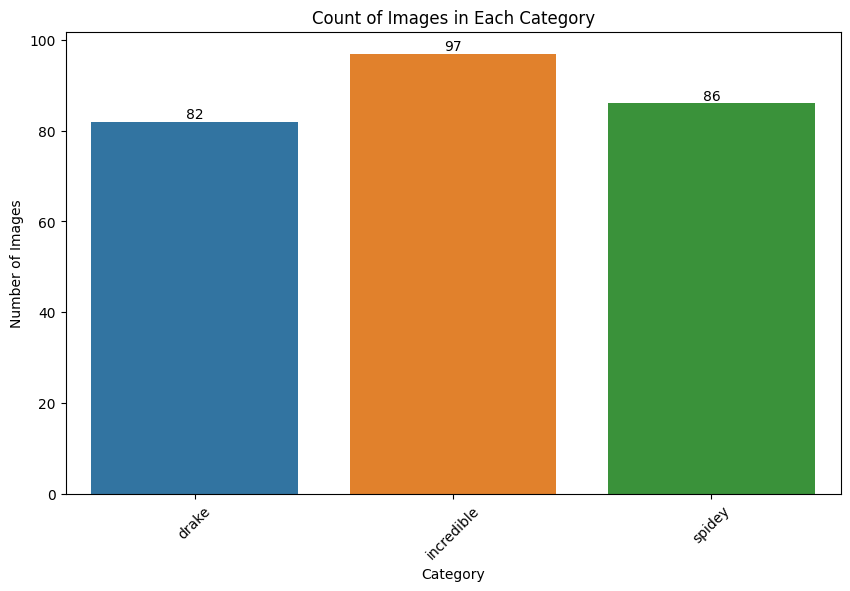

In [3]:
path_to_dataset_folder = '../../datasets/meme_dataset'

def count_images_in_categories(folder_path):
    category_counts = {}
    for category_folder in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category_folder)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            category_counts[category_folder] = num_images
    return category_counts

category_counts = count_images_in_categories(path_to_dataset_folder)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Category')
for index, value in enumerate(category_counts.values()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.show()

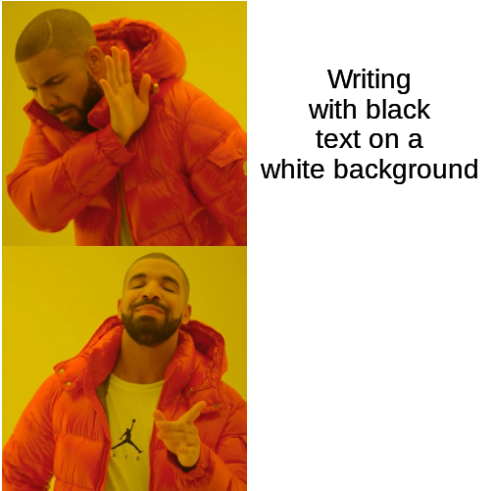

In [3]:
display(Image(filename='../../datasets/meme_dataset/drake/003_drake.png'))

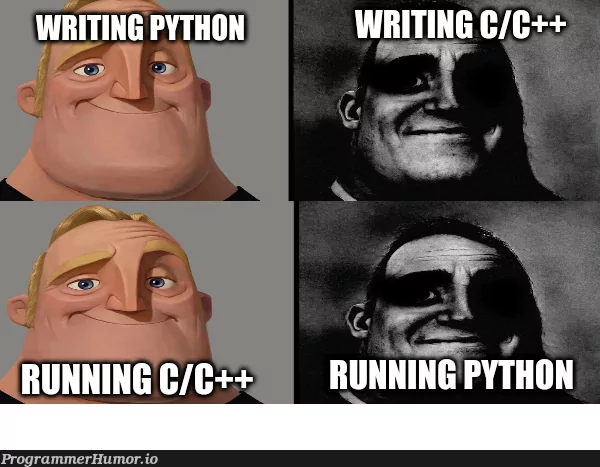

In [4]:
display(Image(filename='../../datasets/meme_dataset/incredible/003_incredible.png'))

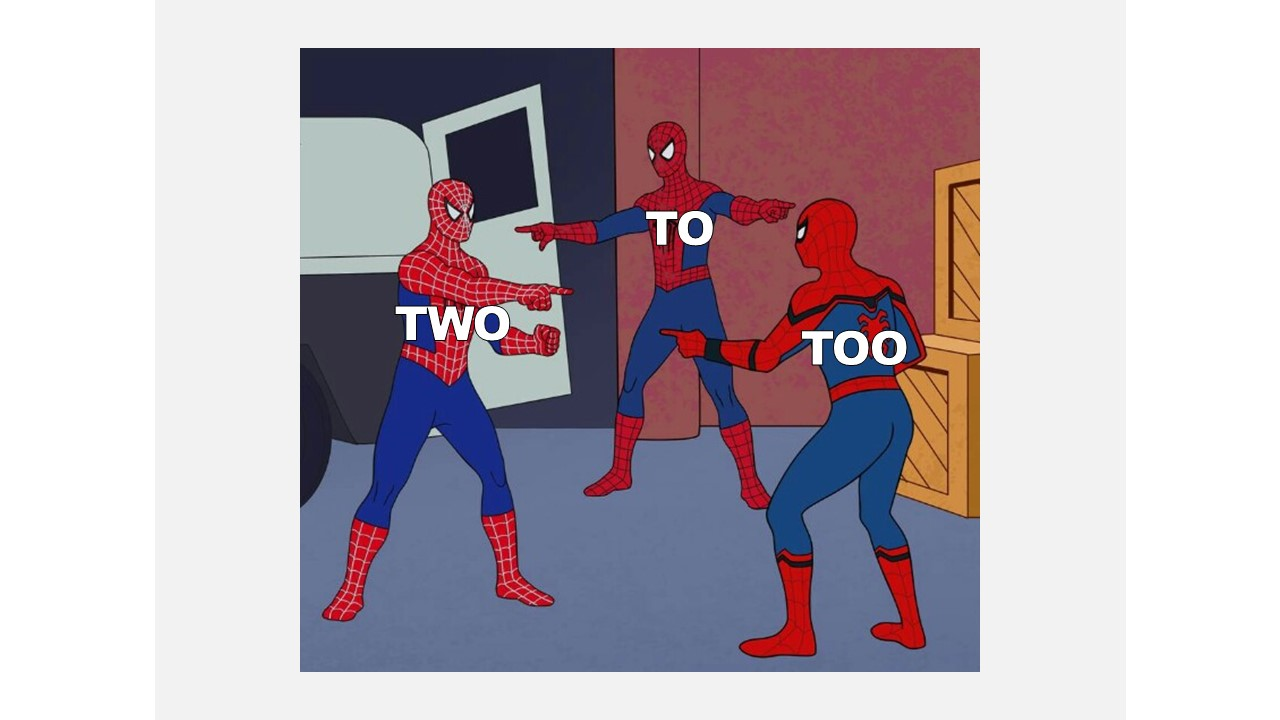

In [5]:
display(Image(filename='../../datasets/meme_dataset/spidey/005_spidey.png'))

In [14]:
!pip install --quiet scikit-image

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, data, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from skimage.metrics import structural_similarity as compare_ssim

# Load sample images (replace with your image paths)
image1 = io.imread('../../datasets/meme_dataset/drake/005_drake.png', as_gray=True)
image2 = io.imread('../../datasets/meme_dataset/drake/006_drake.png', as_gray=True)

# Texture and Pattern Analysis using GLCM
def compute_glcm_features(image):
    # Convert to 8-bit (0-255)
    image = img_as_ubyte(image)

    # Compute GLCM
    glcm = greycomatrix(image, [1], [0], 256, symmetric=True, normed=True)

    # Compute GLCM properties
    contrast = greycoprops(glcm, prop='contrast')[0, 0]
    correlation = greycoprops(glcm, prop='correlation')[0, 0]
    energy = greycoprops(glcm, prop='energy')[0, 0]
    homogeneity = greycoprops(glcm, prop='homogeneity')[0, 0]

    return contrast, correlation, energy, homogeneity

contrast1, correlation1, energy1, homogeneity1 = compute_glcm_features(image1)
contrast2, correlation2, energy2, homogeneity2 = compute_glcm_features(image2)

print("Image 1 GLCM Features:")
print("Contrast:", contrast1)
print("Correlation:", correlation1)
print("Energy:", energy1)
print("Homogeneity:", homogeneity1)

print("Image 2 GLCM Features:")
print("Contrast:", contrast2)
print("Correlation:", correlation2)
print("Energy:", energy2)
print("Homogeneity:", homogeneity2)

Image 1 GLCM Features:
Contrast: 415.11463326653313
Correlation: 0.9294210611859755
Energy: 0.031465920488556495
Homogeneity: 0.33813940854839547
Image 2 GLCM Features:
Contrast: 1104.3128256513028
Correlation: 0.9280639303647901
Energy: 0.369992528696567
Homogeneity: 0.6188430129782956


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

SSIM Score: 0.5276681349921007


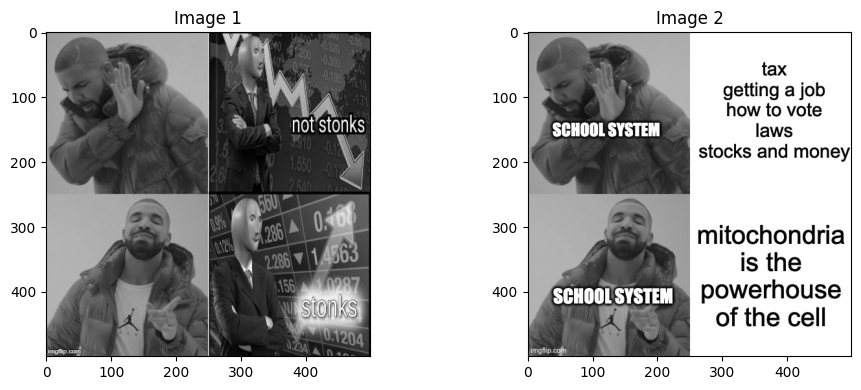

In [24]:
# Pairwise Image Similarity using SSIM
def compute_ssim(image1, image2):
    # Compute SSIM
    ssim = compare_ssim(image1, image2)
    return ssim

ssim_score = compute_ssim(image1, image2)
print("SSIM Score:", ssim_score)

# Display the images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')

plt.tight_layout()
plt.show()